In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [219]:
df = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)

df

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [220]:
df.columns = ['reviews', 'sentiment']

In [221]:
neg_keywords = ['nasty', 'dirty', 'hate', 'worst', 'not good']

for key in neg_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.reviews.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

           sentiment     nasty     dirty      hate     worst  not good
sentiment   1.000000 -0.031639 -0.054855 -0.044766 -0.074121 -0.031639
nasty      -0.031639  1.000000 -0.001736 -0.001416 -0.003015 -0.001001
dirty      -0.054855 -0.001736  1.000000 -0.002456 -0.005228 -0.001736
hate       -0.044766 -0.001416 -0.002456  1.000000 -0.004266 -0.001416
worst      -0.074121 -0.003015 -0.005228 -0.004266  1.000000 -0.003015
not good   -0.031639 -0.001001 -0.001736 -0.001416 -0.003015  1.000000


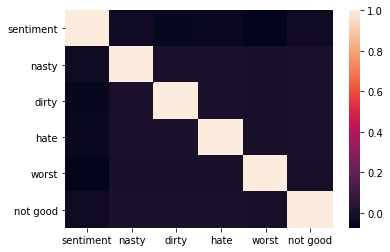

In [222]:
print(df.corr())

sns.heatmap(df.corr())

In [224]:
df2 = df

#Remove punctuation from the reviews column
df2["reviews"] = df2['reviews'].str.replace('[^\w\s]','')

#Let's remove the NaN values from earlier
neg_keywords = ['gross', 'nasty', 'dirty', 'hate', 'worst', 'not good']

for key in neg_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df2[str(key)] = df2.reviews.str.contains(
        str(key),
        case=False
    )


df2.head()

,reviews,sentiment,nasty,dirty,hate,worst,not good,gross
0,Wow Loved this place,1,False,False,False,False,False,False
1,Crust is not good,0,False,False,False,False,True,False
2,Not tasty and the texture was just nasty,0,True,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False


           sentiment     nasty     dirty      hate     worst  not good  \
sentiment   1.000000 -0.054855 -0.063372 -0.054855 -0.106950 -0.083960   
nasty      -0.054855  1.000000 -0.003476 -0.003009 -0.006769 -0.004606   
dirty      -0.063372 -0.003476  1.000000 -0.003476 -0.007820 -0.005321   
hate       -0.054855 -0.003009 -0.003476  1.000000 -0.006769 -0.004606   
worst      -0.106950 -0.006769 -0.007820 -0.006769  1.000000 -0.010361   
not good   -0.083960 -0.004606 -0.005321 -0.004606 -0.010361  1.000000   
gross      -0.063372 -0.003476 -0.004016 -0.003476 -0.007820 -0.005321   

              gross  
sentiment -0.063372  
nasty     -0.003476  
dirty     -0.004016  
hate      -0.003476  
worst     -0.007820  
not good  -0.005321  
gross      1.000000  


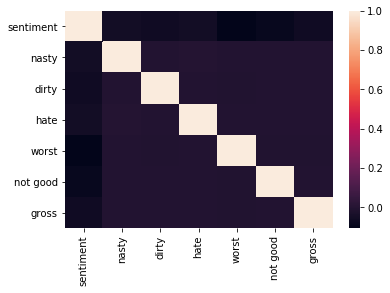

In [225]:
#Make a correlation matrix
print(df.corr())

#Show heatmap
sns.heatmap(df.corr())

In [226]:
data = df2[neg_keywords]
target = df2['sentiment']

In [227]:
data.sum()

gross        4
nasty        3
dirty        4
hate         3
worst       15
not good     7
dtype: int64

In [228]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))


Number of mislabeled points out of a total 1000 points : 466


In [229]:
print(y_pred)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [230]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 35, 465],
       [  1, 499]])

In [231]:
#Sensitivity shows the percentage of positives correctly identified
sensitivity = 499/(499+1)
print('The sensitivity is: ' + str(sensitivity))

#Specificity shows the percentage of negatives correctly identified
specificity = 35/(465+35)
print('The specificity is: ' + str(specificity))

The sensitivity is: 0.998
The specificity is: 0.07


In [232]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

#It's consistent, so our model isn't overfitting, but the model doesn't look to be very accurate.

With 20% Holdout: 0.52
Testing on Sample: 0.534


In [233]:
#Cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

#Consistently bad

array([0.57, 0.52, 0.53, 0.54, 0.52, 0.54, 0.52, 0.55, 0.53, 0.52])

In [235]:
#Let's bring in a new dataframe
df_features = df

#Let's do some additional feature engineering
neg_keywords2 = ['gross', 'nasty', 'dirty', 'hate', 'worst',
                 'bad', 'awful', 'filthy', 'not', 'slow', 'stupid', 'rude']

for key2 in neg_keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_features[str(key2)] = df_features.reviews.str.contains(
        str(key2),
        case=False
    )


df_features.head()

,reviews,sentiment,nasty,dirty,hate,worst,not good,gross,bad,awful,filthy,not,slow,stupid,rude
0,Wow Loved this place,1,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good,0,False,False,False,False,True,False,False,False,False,True,False,False,False
2,Not tasty and the texture was just nasty,0,True,False,False,False,False,False,False,False,False,True,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,False,False,False,False,False


           sentiment     nasty     dirty      hate     worst  not good  \
sentiment   1.000000 -0.054855 -0.063372 -0.054855 -0.106950 -0.083960   
nasty      -0.054855  1.000000 -0.003476 -0.003009 -0.006769 -0.004606   
dirty      -0.063372 -0.003476  1.000000 -0.003476 -0.007820 -0.005321   
hate       -0.054855 -0.003009 -0.003476  1.000000 -0.006769 -0.004606   
worst      -0.106950 -0.006769 -0.007820 -0.006769  1.000000 -0.010361   
not good   -0.083960 -0.004606 -0.005321 -0.004606 -0.010361  1.000000   
gross      -0.063372 -0.003476 -0.004016 -0.003476 -0.007820 -0.005321   
bad        -0.131507 -0.007214 -0.008334 -0.007214  0.047412 -0.011041   
awful      -0.054855 -0.003009 -0.003476 -0.003009 -0.006769 -0.004606   
filthy           NaN       NaN       NaN       NaN       NaN       NaN   
not        -0.259978  0.032627  0.115702  0.032627 -0.048123  0.215302   
slow       -0.100504 -0.005513 -0.006369 -0.005513 -0.012403 -0.008438   
stupid     -0.031639 -0.001736 -0.0020

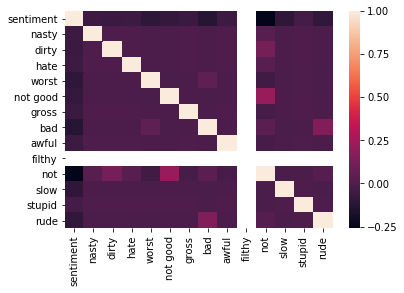

In [236]:
#Make a correlation matrix
print(df_features.corr())

#Show heatmap
sns.heatmap(df_features.corr())

In [237]:
data_features = df_features[neg_keywords2]
target_features = df_features['sentiment']

In [238]:
data_features.sum()

gross       4
nasty       3
dirty       4
hate        3
worst      15
bad        17
awful       3
filthy      0
not       132
slow       10
stupid      1
rude        9
dtype: int64

In [239]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb_features = BernoulliNB()

# Fit our model to the data.
bnb_features.fit(data_features, target_features)

# Classify, storing the result in a new variable.
y_pred_features = bnb_features.predict(data_features)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_features.shape[0],
    (target_features != y_pred_features).sum()
))


Number of mislabeled points out of a total 1000 points : 358


In [240]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_features, y_pred_features)

array([[165, 335],
       [ 23, 477]])

In [241]:
#Sensitivity shows the percentage of positives correctly identified
sensitivity_features = 477/(477+23)
print('The sensitivity is: ' + str(sensitivity_features))

#Specificity shows the percentage of negatives correctly identified
specificity_features = 165/(165+335)
print('The specificity is: ' + str(specificity_features))

The sensitivity is: 0.954
The specificity is: 0.33


In [242]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_features, target_features, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb_features.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb_features.fit(data_features, target_features).score(data_features, target_features)))

#Consistent, so our model isn't overfitting, but the model doesn't look to be very accurate,
#and more words seem to be increasing our accuracy.

With 20% Holdout: 0.61
Testing on Sample: 0.642


In [243]:
#Cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(bnb_features, data_features, target_features, cv=10)

array([0.65, 0.61, 0.65, 0.62, 0.64, 0.68, 0.66, 0.65, 0.65, 0.6 ])